# Visualiser for dummy area28 metric data

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [185]:
df = pd.read_json("data.json")
df

,id,type,userId,sessionId,timestamp,data
0,1,CORE_SCENE_JOIN,1,1,2021-11-01 05:45:44,{}
1,2,CORE_SCENE_LEAVE,1,1,2021-11-01 05:46:39,{}
2,3,CORE_SCENE_JOIN,2,2,2021-11-01 05:45:41,{}
3,4,CORE_SCENE_LEAVE,2,2,2021-11-01 05:49:04,{}
4,5,CORE_SCENE_JOIN,3,3,2021-11-01 04:15:41,{}
5,6,CORE_SCENE_LEAVE,3,3,2021-11-01 04:17:45,{}
6,7,CORE_SCENE_JOIN,4,4,2021-11-01 04:35:41,{}
7,8,CORE_SCENE_LEAVE,4,4,2021-11-01 04:39:02,{}
8,9,CORE_SCENE_JOIN,1,5,2021-11-02 05:46:35,{}
9,10,CORE_SCENE_LEAVE,1,5,2021-11-02 05:49:55,{}


In [186]:
import calendar

durations = df.groupby(['userId', 'sessionId'])['timestamp'].diff()
df['datetime'] = pd.to_datetime(df['timestamp'])
df['date'] = [dt.datetime.date(d) for d in df['datetime']] 
df['time'] = [dt.datetime.time(d) for d in df['datetime']]
df['weekday'] = [calendar.day_name[d.weekday()] for d in df['datetime']]

df['duration'] = durations
df_processed = df[['userId', 'sessionId', 'duration', 'date', 'time', 'weekday']].copy()
df_processed = df_processed.dropna()
df_processed

,userId,sessionId,duration,date,time,weekday
1,1,1,0 days 00:00:55,2021-11-01,05:46:39,Monday
3,2,2,0 days 00:03:23,2021-11-01,05:49:04,Monday
5,3,3,0 days 00:02:04,2021-11-01,04:17:45,Monday
7,4,4,0 days 00:03:21,2021-11-01,04:39:02,Monday
9,1,5,0 days 00:03:20,2021-11-02,05:49:55,Tuesday
11,2,6,0 days 00:05:09,2021-11-02,08:21:42,Tuesday
13,3,7,0 days 00:02:10,2021-11-02,06:22:05,Tuesday
15,4,8,0 days 00:01:50,2021-11-02,05:46:35,Tuesday


### Bar Chart showing how long users spent per session

<BarContainer object of 8 artists>

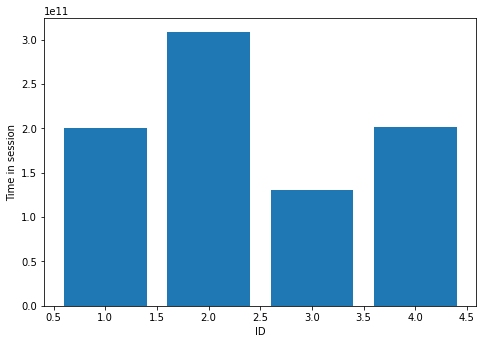

In [187]:
# df_processed.plot(x="userId", y=["times"])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Time in session')
ax.set_xlabel('ID')
ax.bar(df_processed['userId'], df_processed['duration'])

# Heatmap showing time spent in session for each user during a week

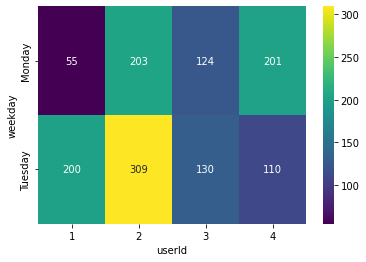

In [188]:
from pandas import DataFrame
import seaborn as sns
import time
%matplotlib inline

df_processed['seconds'] = [d.total_seconds() for d in df_processed['duration']]

df_heatmap = df_processed.pivot(index='weekday', columns='userId', values='seconds')

sns.heatmap(df_heatmap, annot=True, fmt="g", cmap='viridis')
plt.show()

In [118]:
dt.datetime.now().timestamp()


1635831995.476573